<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Проверка-расчёта-обогащения-(rougher.output.recovery)" data-toc-modified-id="Проверка-расчёта-обогащения-(rougher.output.recovery)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчёта обогащения (<code>rougher.output.recovery</code>)</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов" data-toc-modified-id="Концентрация-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов</a></span><ul class="toc-item"><li><span><a href="#Au" data-toc-modified-id="Au-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Au</a></span></li><li><span><a href="#Ag" data-toc-modified-id="Ag-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Ag</a></span></li><li><span><a href="#Pb" data-toc-modified-id="Pb-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Pb</a></span></li></ul></li><li><span><a href="#Размеры-гранул-сырья" data-toc-modified-id="Размеры-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размеры гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ" data-toc-modified-id="Суммарная-концентрация-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-sMAPE" data-toc-modified-id="Функция-для-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для sMAPE</a></span></li><li><span><a href="#Обучение-моделей,-кросс-валидация" data-toc-modified-id="Обучение-моделей,-кросс-валидация-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей, кросс-валидация</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Обогащение золотой руды

Нужно подготовить прототип модели машинного обучения для компании, разрабатывающей решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

### Загрузка данных

In [59]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.experimental import enable_halving_search_cv 
#from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
import warnings
#from random import seed, random
#import statistics

In [2]:
dt.datetime.today().strftime("%d.%m.%Y %H:%M")

'22.06.2022 17:52'

In [3]:
#warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
pth1 = '/datasets/'
pth2 = ''
if os.path.exists(pth1+'gold_recovery_train_new.csv'):
    df_train = pd.read_csv(pth1+'gold_recovery_train_new.csv')
    df_test = pd.read_csv(pth1+'gold_recovery_test_new.csv')
    df_full = pd.read_csv(pth1+'gold_recovery_full_new.csv')
elif os.path.exists(pth2+'gold_recovery_train_new.csv'):
    df_train = pd.read_csv(pth2+'gold_recovery_train_new.csv')
    df_test = pd.read_csv(pth2+'gold_recovery_test_new.csv')
    df_full = pd.read_csv(pth2+'gold_recovery_full_new.csv')
else:
    print('Something is wrong')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [7]:
df_train.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [9]:
df_test.head(2)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [11]:
df_full.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


В обучающих данных 87 столбцов, в тестовых - 53.

Некоторые параметры недоступны, потому что замеряются и/или
рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют
некоторые признаки, которые могут быть в обучающей. Также в тестовом
наборе нет целевых признаков. Исходный датасет содержит обучающую и тестовую выборки со всеми
признаками.

### Проверка расчёта обогащения (`rougher.output.recovery`)
Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдём MAE между нашими расчётами и значением признака. Опишем
выводы.

In [13]:
df_tmp = df_train[['rougher.input.feed_au',
                   'rougher.output.concentrate_au',
                   'rougher.output.tail_au',
                   'rougher.output.recovery',
                   ]]
df_tmp.head(3)

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery
0,6.486150,19.793808,1.170244,87.107763
1,6.478583,20.050975,1.184827,86.843261
2,6.362222,19.737170,1.162562,86.842308


In [29]:
df_tmp.columns = ['F', 'C', 'T', 'recovery','calculated_recovery']

# df_tmp_sample = df_tmp.sample(frac=0.05)
# df_tmp_sample['calculated_recovery'] = (df_tmp['C'] * (df_tmp['F'] - df_tmp['T'])) / (df_tmp['F'] * (df_tmp['C'] - df_tmp['T'])) * 100  # %
# df_tmp_sample.head(5)

df_tmp.loc[:,'calculated_recovery'] = (df_tmp['C'] * (df_tmp['F'] - df_tmp['T'])) / (df_tmp['F'] * (df_tmp['C'] - df_tmp['T'])) * 100  # %
df_tmp.head(5)

,F,C,T,recovery,calculated_recovery
0,6.486150,19.793808,1.170244,87.107763,87.107763
1,6.478583,20.050975,1.184827,86.843261,86.843261
2,6.362222,19.737170,1.162562,86.842308,86.842308
3,6.118189,19.320810,1.079755,87.226430,87.226430
4,5.663707,19.216101,1.012642,86.688794,86.688794


In [31]:
mae_tmp = mean_absolute_error(df_tmp['calculated_recovery'], df_tmp['recovery'])
mae_tmp

9.682896147825551e-15

Есть очень незначительное расхождение между расчётным recovery и имеющимся. Думаю, им можно пренебречь, т.к. полученное MAE = 10<sup>-15</sup> - довольно мало.

### Признаки, недоступные в тестовой выборке.
Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры, к какому типу относятся.

In [45]:
#type(df_train.columns)
pd.DataFrame(list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())),
            columns=['col']).sort_values(
    by='col', ascending=False).reset_index(drop=True)

,col
0,secondary_cleaner.output.tail_sol
1,secondary_cleaner.output.tail_pb
2,secondary_cleaner.output.tail_au
3,secondary_cleaner.output.tail_ag
4,rougher.output.tail_sol
5,rougher.output.tail_pb
6,rougher.output.tail_au
7,rougher.output.tail_ag
8,rougher.output.recovery
9,rougher.output.concentrate_sol


Как видим, в тестовой выборке недоступны все параметры продукта на всех этапах (`output`), а также расчётные характеристики (`calculation`) флотации (`rougher`).

### Предобработка данных

## Анализ данных

### Концентрация металлов
Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

#### Au

In [47]:
pd.DataFrame( df_train.columns.tolist(), columns=['col'] ).query(
    'col.str.contains("au")', engine='python').sort_values(
    by='col', ascending=True).reset_index(drop=True)

,col
0,final.output.concentrate_au
1,final.output.tail_au
2,primary_cleaner.output.concentrate_au
3,primary_cleaner.output.tail_au
4,rougher.calculation.au_pb_ratio
5,rougher.calculation.floatbank10_sulfate_to_au_...
6,rougher.calculation.floatbank11_sulfate_to_au_...
7,rougher.calculation.sulfate_to_au_concentrate
8,rougher.input.feed_au
9,rougher.output.concentrate_au


In [48]:
df_tmp_211 = df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                       'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 
                       'secondary_cleaner.output.tail_au', 'final.output.tail_au' ]]
df_tmp_211.head(3)

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,secondary_cleaner.output.tail_au,final.output.tail_au
0,6.486150,19.793808,34.174427,42.192020,2.606185,2.143149
1,6.478583,20.050975,34.118526,42.701629,2.488248,2.224930
2,6.362222,19.737170,33.969464,42.657501,2.458187,2.257889


Видно, как растёт концентрация золота.

Параметра `secondary_cleaner.output.concentrate_au` не нашлось, но есть параметр `final.output.concentrate_au`. (Правда, не совсем понятно, например, почему отличаются значения 'secondary_cleaner.output.tail_au' и 'final.output.tail_au', ведь вторичная очистка - это последний этап.)

In [53]:
df_tmp_211.columns = ['rougher_input_feed_au', 'rougher_output_concentrate_au', 
                       'primary_cleaner_output_concentrate_au', 'final_output_concentrate_au',
                     'secondary_cleaner_output_tail_au', 'final_output_tail_au']

In [57]:
y = [df_tmp_211.rougher_input_feed_au.mean(), 
     df_tmp_211.rougher_output_concentrate_au.mean(),
     df_tmp_211.primary_cleaner_output_concentrate_au.mean(), 
     df_tmp_211.final_output_concentrate_au.mean()
    ]
y

[7.866576841919407, 19.43995785143646, 32.386835978391346, 44.00379162105571]

In [58]:
x = ['input', 'rougher', 'first', 'final']

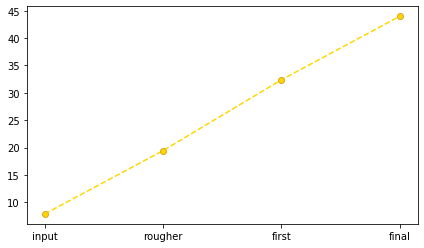

In [66]:
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(x, y, figure=fig, color='gold', marker='o', ls='--', mec='goldenrod')
plt.show();

#### Ag

#### Pb

### Размеры гранул сырья
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

### Суммарная концентрация всех веществ
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

## Модель

### Функция для sMAPE
Напишем функцию для вычисления итоговой sMAPE.

### Обучение моделей, кросс-валидация
Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке